<a name="building-language-model"></a>
# Building the language model

<a name="count-matrix"></a>
### Count matrix

To calculate the n-gram probability, you will need to count frequencies of n-grams and n-gram prefixes in the training dataset. In some of the code assignment exercises, you will store the n-gram frequencies in a dictionary. 

In other parts of the assignment, you will build a count matrix that keeps counts of (n-1)-gram prefix followed by all possible last words in the vocabulary.

The following code shows how to check, retrieve and update counts of n-grams in the word count dictionary.

In [4]:
# manipulate n_gram count dictionary

n_gram_counts = {
    ('i', 'am', 'happy'): 2,
    ('am', 'happy', 'because'): 1}

# get count for an n-gram tuple
print(f"count of n-gram {('i', 'am', 'happy')}: {n_gram_counts[('i', 'am', 'happy')]}")

# check if n-gram is present in the dictionary
if ('i', 'am', 'learning') in n_gram_counts:
    print(f"n-gram {('i', 'am', 'learning')} found")
else:
    print(f"n-gram {('i', 'am', 'learning')} missing")

# update the count in the word count dictionary
n_gram_counts[('i', 'am', 'learning')] = 1
if ('i', 'am', 'learning') in n_gram_counts:
    print(f"n-gram {('i', 'am', 'learning')} found")
else:
    print(f"n-gram {('i', 'am', 'learning')} missing")


count of n-gram ('i', 'am', 'happy'): 2
n-gram ('i', 'am', 'learning') missing
n-gram ('i', 'am', 'learning') found


The next code snippet shows how to merge two tuples in Python. That will be handy when creating the n-gram from the prefix and the last word.

In [7]:
# concatenate tuple for prefix and tuple with the last word to create the n_gram
prefix = ('i', 'am', 'happy')
word = 'because'

# note here the syntax for creating a tuple for a single word
n_gram = prefix + (word,)
print(n_gram)

('i', 'am', 'happy', 'because')


In the lecture, you've seen that the count matrix could be made in a single pass through the corpus. Here is one approach to do that.

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
def single_pass_trigram_count_matrix(corpus):
    """
    Creates the trigram count matrix from the input corpus in a single pass through the corpus.
    
    Args:
        corpus: Pre-processed and tokenized corpus. 
    
    Returns:
        bigrams: list of all bigram prefixes, row index
        vocabulary: list of all found words, the column index
        count_matrix: pandas dataframe with bigram prefixes as rows, 
                      vocabulary words as columns 
                      and the counts of the bigram/word combinations (i.e. trigrams) as values
    """
    bigrams = []
    vocabulary = []
    count_matrix_dict = defaultdict(dict)
    
    # go through the corpus once with a sliding window
    for i in range(len(corpus) - 3 + 1):
        # the sliding window starts at position i and contains 3 words
        trigram = tuple(corpus[i : i + 3])
        
        bigram = trigram[0 : -1]
        if not bigram in bigrams:
            bigrams.append(bigram)        
        
        last_word = trigram[-1]
        if not last_word in vocabulary:
            vocabulary.append(last_word)
        
        if (bigram,last_word) not in count_matrix_dict:
            count_matrix_dict[bigram,last_word] = 0
            
        count_matrix_dict[bigram,last_word] += 1
    
    # convert the count_matrix to np.array to fill in the blanks
    count_matrix = np.zeros((len(bigrams), len(vocabulary)))
    for trigram_key, trigam_count in count_matrix_dict.items():
        count_matrix[bigrams.index(trigram_key[0]), \
                     vocabulary.index(trigram_key[1])]\
        = trigam_count
    
    # np.array to pandas dataframe conversion
    count_matrix = pd.DataFrame(count_matrix, index=bigrams, columns=vocabulary)
    return bigrams, vocabulary, count_matrix

corpus = ['i', 'am', 'happy', 'because', 'i', 'am', 'learning', '.']

bigrams, vocabulary, count_matrix = single_pass_trigram_count_matrix(corpus)

print(count_matrix)


                  happy  because    i   am  learning    .
(i, am)             1.0      0.0  0.0  0.0       1.0  0.0
(am, happy)         0.0      1.0  0.0  0.0       0.0  0.0
(happy, because)    0.0      0.0  1.0  0.0       0.0  0.0
(because, i)        0.0      0.0  0.0  1.0       0.0  0.0
(am, learning)      0.0      0.0  0.0  0.0       0.0  1.0


In [9]:
x1 = x2 = x3 = [1, 2, 3, 4, 5, 6]

sum_3 = []
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(len(x3)):
            sum_3.append(x1[i]+ x2[j]+ x3[k])

print(sum_3)


[3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 13, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 7, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 8, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 15, 11, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 17, 13, 14, 15, 16, 17, 18]


In [10]:
len(sum_3)

216

In [11]:
import pandas as pd

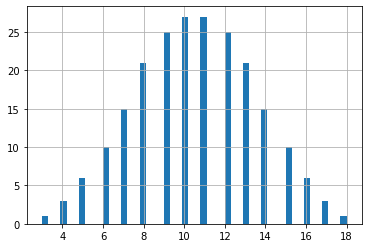

In [17]:
series = pd.Series(sum_3)
series.hist(bins=50);

In [19]:
count_dict ={}
for num in sum_3:
    if num in count_dict.keys():
        count_dict[num] += 1
    else:
        count_dict[num] = 1

print(count_dict)

{3: 1, 4: 3, 5: 6, 6: 10, 7: 15, 8: 21, 9: 25, 10: 27, 11: 27, 12: 25, 13: 21, 14: 15, 15: 10, 16: 6, 17: 3, 18: 1}


In [21]:
series_dict = pd.Series(count_dict)
print(series_dict)

3      1
4      3
5      6
6     10
7     15
8     21
9     25
10    27
11    27
12    25
13    21
14    15
15    10
16     6
17     3
18     1
dtype: int64


In [25]:
count_dict2 = {}

for i in count_dict.keys():
    count_dict2[i] = (count_dict[i],count_dict[i]/len(sum_3)*100)

print(count_dict2)

{3: (1, 0.4629629629629629), 4: (3, 1.3888888888888888), 5: (6, 2.7777777777777777), 6: (10, 4.62962962962963), 7: (15, 6.944444444444445), 8: (21, 9.722222222222223), 9: (25, 11.574074074074074), 10: (27, 12.5), 11: (27, 12.5), 12: (25, 11.574074074074074), 13: (21, 9.722222222222223), 14: (15, 6.944444444444445), 15: (10, 4.62962962962963), 16: (6, 2.7777777777777777), 17: (3, 1.3888888888888888), 18: (1, 0.4629629629629629)}


In [30]:
def get_prob(dict, start, end):
    """
    input: 
    start: the start key
    end: the end key

    output:
    """
    prob = 0
    for i in range(start, end+1):
        prob += dict[i][1]
    
    return prob

    


In [36]:
get_prob(count_dict2,4,10)

49.53703703703704

In [40]:
df = pd.DataFrame(data=count_dict2.values(), columns=['count','prob'],index=count_dict2.keys())
df


,count,prob
3,1,0.462963
4,3,1.388889
5,6,2.777778
6,10,4.629630
7,15,6.944444
8,21,9.722222
9,25,11.574074
10,27,12.500000
11,27,12.500000
12,25,11.574074


In [45]:
import pandas as pd

# Create a sample DataFrame
data = {'fruit': ['apple', 'banana', 'apple', 'orange', 'banana', 'banana']}
df = pd.DataFrame(data)
print(f"before:'/n' {df}")
# Apply the code to the 'fruit' column
i = 'fruit'
p = df[i].value_counts().to_dict()
df[i] = df[i].map(p)

# Print the modified DataFrame
print(f"after:'/n' {df}")

before:'/n'     fruit
0   apple
1  banana
2   apple
3  orange
4  banana
5  banana
after:'/n'    fruit
0      2
1      3
2      2
3      1
4      3
5      3


In [42]:
print(p)

{'banana': 3, 'apple': 2, 'orange': 1}


In [49]:
for i in range(5):
    print(i)

0
1
2
3
4


In [1]:
a = ['a', 'b', 'c']
a[0:-1]

['a', 'b']

<a name="probability-matrix"></a>
### Probability matrix
The next step is to build a probability matrix from the count matrix. 

You can use an object dataframe from library pandas and its methods [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum) and [div](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html) to normalize the cell counts with the sum of the respective rows. 

In [4]:
# create the probability matrix from the count matrix
row_sums = count_matrix.sum(axis=1)
# divide each row by its sum
prob_matrix = count_matrix.div(row_sums, axis=0)

print(prob_matrix)

                  happy  because    i   am  learning    .
(i, am)             0.5      0.0  0.0  0.0       0.5  0.0
(am, happy)         0.0      1.0  0.0  0.0       0.0  0.0
(happy, because)    0.0      0.0  1.0  0.0       0.0  0.0
(because, i)        0.0      0.0  0.0  1.0       0.0  0.0
(am, learning)      0.0      0.0  0.0  0.0       0.0  1.0


The probability matrix now helps you to find a probability of an input trigram. 

In [5]:
# find the probability of a trigram in the probability matrix
trigram = ('i', 'am', 'happy')

# find the prefix bigram 
bigram = trigram[:-1]
print(f'bigram: {bigram}')

# find the last word of the trigram
word = trigram[-1]
print(f'word: {word}')

# we are using the pandas dataframes here, column with vocabulary word comes first, row with the prefix bigram second
trigram_probability = prob_matrix[word][bigram]
print(f'trigram_probability: {trigram_probability}')

bigram: ('i', 'am')
word: happy
trigram_probability: 0.5
